# Time Series의 Feature Engineering

In [1]:
import pandas as pd
from datetime import datetime

df = pd.DataFrame()
df['date'] = [datetime(2021, 12, 1), datetime(2021, 12, 2), 
              datetime(2021, 12, 3), datetime(2021, 12, 4), datetime(2021, 12, 5)]
df['birth'] = [35, 32, 30, 31, 44]
df

,date,birth
0,2021-12-01,35
1,2021-12-02,32
2,2021-12-03,30
3,2021-12-04,31
4,2021-12-05,44


## date time feature

In [2]:
features = df.copy()
features['year'] = df['date'].dt.year
features['month'] = df['date'].dt.month
features['day'] = df['date'].dt.day
features

,date,birth,year,month,day
0,2021-12-01,35,2021,12,1
1,2021-12-02,32,2021,12,2
2,2021-12-03,30,2021,12,3
3,2021-12-04,31,2021,12,4
4,2021-12-05,44,2021,12,5


## Lag features (지연 특성)

In [3]:
features['lag1'] = df['birth'].shift(1)
features['lag2'] = df['birth'].shift(3)
features

,date,birth,year,month,day,lag1,lag2
0,2021-12-01,35,2021,12,1,NaN,NaN
1,2021-12-02,32,2021,12,2,35.0,NaN
2,2021-12-03,30,2021,12,3,32.0,NaN
3,2021-12-04,31,2021,12,4,30.0,35.0
4,2021-12-05,44,2021,12,5,31.0,32.0


## Window features

### Rolling Window

In [4]:
features['Roll_mean'] = df['birth'].rolling(window=2).mean()
features['Roll_max']  = df['birth'].rolling(window=3).max()
features

,date,birth,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,2021-12-01,35,2021,12,1,NaN,NaN,NaN,NaN
1,2021-12-02,32,2021,12,2,35.0,NaN,33.5,NaN
2,2021-12-03,30,2021,12,3,32.0,NaN,31.0,35.0
3,2021-12-04,31,2021,12,4,30.0,35.0,30.5,32.0
4,2021-12-05,44,2021,12,5,31.0,32.0,37.5,44.0


### Expanding Window

In [5]:
features['Expand_max'] = df['birth'].expanding().max()
features

,date,birth,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,2021-12-01,35,2021,12,1,NaN,NaN,NaN,NaN,35.0
1,2021-12-02,32,2021,12,2,35.0,NaN,33.5,NaN,35.0
2,2021-12-03,30,2021,12,3,32.0,NaN,31.0,35.0,35.0
3,2021-12-04,31,2021,12,4,30.0,35.0,30.5,32.0,35.0
4,2021-12-05,44,2021,12,5,31.0,32.0,37.5,44.0,44.0


## Downsampling and Upsampling

In [6]:
url = "https://raw.githubusercontent.com/ironmanciti/Time_Series_Lecture/main/datasets/us-airlines-monthly-aircraft-miles-flown.csv"
miles_df = pd.read_csv(url, parse_dates=[0])
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


### Downsampling

- 최소 2 개의 argument 필요 : new frequency, data 상의 date column

<table>
    <th>Alias</th>
    <th>Description</th>
    <tr>
    <td>B</td>
    <td>Business day</td>
    </tr>
    <tr>
    <td>D</td>
    <td>Calendar day</td>
    </tr>
    <tr>
    <td>W</td>
    <td>Weekly</td>
    </tr>
    <tr>
    <td>M</td>
    <td>Monthly</td>
    </tr>
    <tr>
    <td>Q</td>
    <td>Quarter end</td>
    </tr>
    <tr>
    <td>A</td>
    <td>Year end</td>
    </tr>
    <tr>
    <td>BA</td>
    <td>Business Year end</td>
    </tr>
    <tr>
    <td>H</td>
    <td>Hourly frequency</td>
    </tr>
    <tr>
    <td>S</td>
    <td>Second frequency</td>
    </tr>
</table>

In [8]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [9]:
yearly_miles_df = miles_df.resample('A', on='Month').sum()
yearly_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


### `first() / last()` method

In [10]:
i = pd.date_range('2018-04-09', periods=4, freq='2D')
ts = pd.DataFrame({'A': [1, 2, 3, 4]}, index=i)
ts

,A
2018-04-09,1
2018-04-11,2
2018-04-13,3
2018-04-15,4


In [11]:
#last 3 observation이 아니라 3D이므로 2개 return
ts.last('3D') 

,A
2018-04-13,3
2018-04-15,4


In [12]:
ts[-3:]

,A
2018-04-11,2
2018-04-13,3
2018-04-15,4


### Upsampling
- increase frequency

In [13]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


보간법을 이용하여 NaN 값을 채움

In [14]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')
interpolated_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


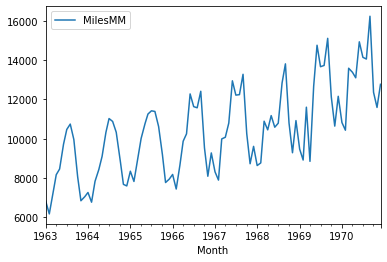

In [19]:
interpolated_miles_df.plot()

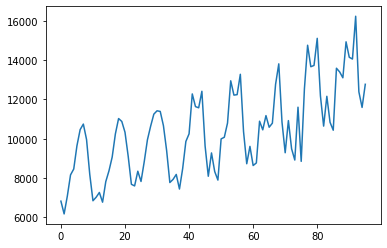

In [25]:
miles_df['MilesMM'].plot()